In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
### boston house prediction###


In [9]:
from sklearn.datasets import load_boston

In [10]:
boston=load_boston()

In [11]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
## checking the description of dataset to begin wih##
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [15]:
### [preparing the dataset]

In [16]:
dataset= pd.DataFrame(boston.data,columns= boston.feature_names)

In [17]:
dataset.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


In [18]:
dataset['Price']=boston.target

In [19]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [22]:
###summarizing the stats of the data##

In [23]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
###checking the missing values which most priorier##

In [25]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [26]:
###Exploretary data analysis
#checking correlation##

In [27]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

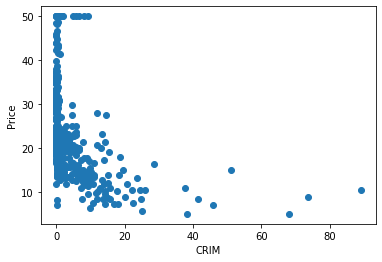

In [28]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel('CRIM')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

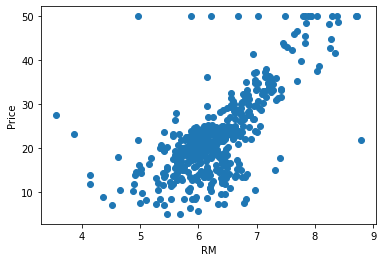

In [29]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='Price'>

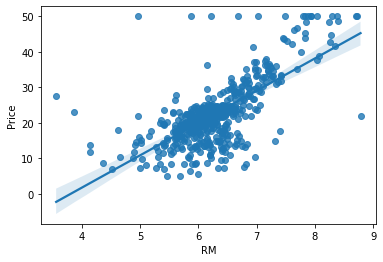

In [30]:
import seaborn as sns
sns.regplot(x='RM',y='Price',data = dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

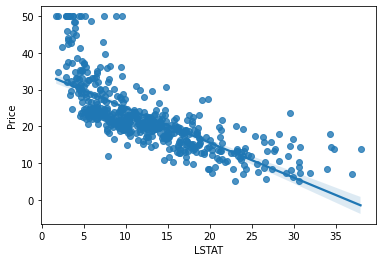

In [31]:
sns.regplot(x='LSTAT',y='Price',data = dataset)

<AxesSubplot:xlabel='AGE', ylabel='Price'>

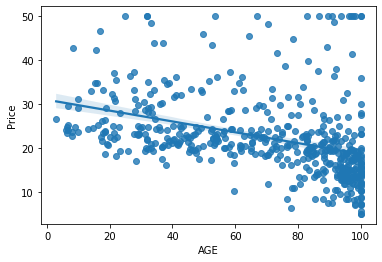

In [32]:
sns.regplot(x='AGE',y='Price',data = dataset)

In [33]:
### Spliting data into x and y

In [34]:
X = dataset.drop(['Price'],axis = 'columns')

In [35]:
y = dataset[['Price']]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [38]:
### standard scalar using

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [41]:
X_train

array([[-0.3892494 , -0.49559343, -0.60928978, ..., -0.24857777,
         0.28674182, -0.96685016],
       [-0.38783184,  0.57923879, -0.86952633, ...,  0.58214721,
         0.36669519, -0.82116789],
       [ 1.43554993, -0.49559343,  1.02669166, ...,  0.81290414,
         0.43472666,  2.50177533],
       ...,
       [ 0.23804008, -0.49559343,  1.02669166, ...,  0.81290414,
         0.43472666,  0.9145323 ],
       [-0.36856615, -0.49559343, -0.713092  , ..., -0.47933471,
         0.21433534, -0.26341291],
       [-0.39596611, -0.49559343, -0.74818007, ...,  0.35139027,
         0.43472666, -0.55616491]])

In [42]:
###model training

In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [44]:
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
###to check coeff
print(regression.coef_)

[[-1.02670073  1.35041325  0.12557673  0.57522815 -2.28609206  2.13083882
   0.12702443 -3.17856741  2.64730569 -1.87781254 -2.14296387  0.6693739
  -3.92551025]]


In [46]:
### to check intercepts
print(regression.intercept_)

[22.52227723]


In [47]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [48]:
reg_pred = regression.predict(X_test)

In [49]:
reg_pred 

array([[32.65503184],
       [28.0934953 ],
       [18.02901829],
       [21.47671576],
       [18.8254387 ],
       [19.87997758],
       [32.42014863],
       [18.06597765],
       [24.42277848],
       [27.00977832],
       [27.04081017],
       [28.75196794],
       [21.15677699],
       [26.85200196],
       [23.38835945],
       [20.66241266],
       [17.33082198],
       [38.24813601],
       [30.50550873],
       [ 8.74436733],
       [20.80203902],
       [16.26328126],
       [25.21805656],
       [24.85175752],
       [31.384365  ],
       [10.71311063],
       [13.80434635],
       [16.65930389],
       [36.52625779],
       [14.66750528],
       [21.12114902],
       [13.95558618],
       [43.16210242],
       [17.97539649],
       [21.80116017],
       [20.58294808],
       [17.59938821],
       [27.2212319 ],
       [ 9.46139365],
       [19.82963781],
       [24.30751863],
       [21.18528812],
       [29.57235682],
       [16.3431752 ],
       [19.31483171],
       [14

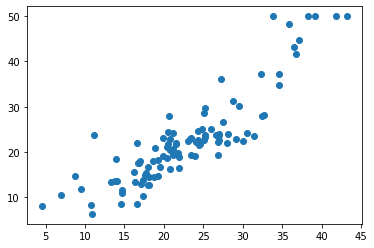

In [50]:
##plot a scatter plot for the prediction
plt.scatter(reg_pred,y_test)

In [51]:
##prediction with residual(residual = error)
residuals = y_test-reg_pred

In [52]:
residuals

,Price
307,-4.455032
343,-4.193495
47,-1.429018
67,0.523284
362,1.974561
...,...
92,-6.189918
224,7.680621
110,1.167290
426,-7.168400


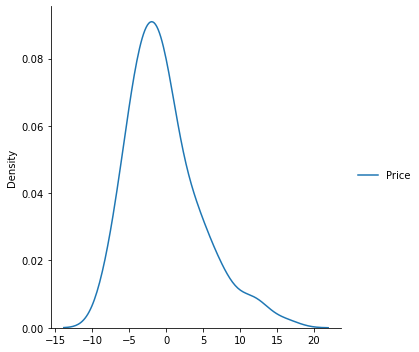

In [53]:
##plotting this residuals
sns.displot(residuals, kind = 'kde')

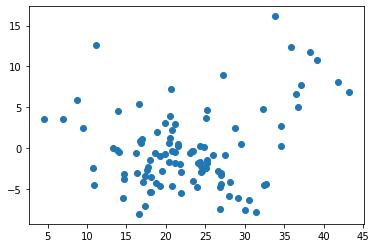

In [54]:
##scatter plot with respect to residuals and prediction
plt.scatter(reg_pred,residuals)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(reg_pred,y_test))
print(mean_squared_error(reg_pred,y_test))

3.7507121808389146
23.3808364802702


In [56]:
###r square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7634174432138474


In [57]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7284677473249839

In [58]:
boston.data[6].shape

(13,)

In [59]:
boston.data[6].reshape(1,-1)

array([[8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
        6.0120e+00, 6.6600e+01, 5.5605e+00, 5.0000e+00, 3.1100e+02,
        1.5200e+01, 3.9560e+02, 1.2430e+01]])

In [60]:
boston.data[6].reshape(1,-1).shape

(1, 13)

In [61]:
 ## scalar transformation new data
scalar.transform(boston.data[6].reshape(1,-1))

array([[-0.39507398,  0.04182268, -0.46893749, -0.29329423, -0.2486189 ,
        -0.3730409 , -0.04681899,  0.81873677, -0.51563569, -0.54648024,
        -1.49466524,  0.42050786, -0.04835813]])

In [64]:
regression.predict(scalar.transform(boston.data[6].reshape(1,-1)))

array([[23.25736073]])

In [62]:
import pickle
pickle.dump(regression,open('regmodel.pk1','wb'))

In [63]:
pickled_model=pickle.load(open('regmodel.pk1','rb'))

In [64]:
pickled_model.predict(scalar.transform(boston.data[6].reshape(1,-1)))

array([[23.25736073]])